
# Exploring Smartphone Trends on Jumia Kenya

Jumia, one of Africa's largest online shopping platforms, serves as a hub for diverse products, including a vast selection of smartphones. This project dives deep into the smartphone category by web scraping data from all 50 pages of phone listings on the platform.

The scraped data undergoes cleaning and preparation for analysis, using techniques like Natural Language Processing (NLP) to refine and extract valuable insights. The ultimate goal is to uncover patterns and trends in smartphone sales, such as price ranges, popular brands, and feature preferences. This exploration offers a comprehensive look into the dynamics of smartphone sales on Jumia Kenya, providing actionable insights for potential buyers, sellers, and market analysts.

## 1. Scraping the data.
The data will be scraped from all pages of the Jumia Kenya smartphones category using the URL: "https://www.jumia.co.ke/smartphones/?shipped_from=country_local&page=".


In [1]:
# Importing required libraries
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
page = 1
names = []
prices = []

while page != 6:
    url = f"https://www.jumia.co.ke/smartphones/?shipped_from=country_local&page={page}"
    response = requests.get(url)
    html = response.content
    soup = bs(html, "html.parser")


    for product_block in soup.find_all("a", class_="core"):
        name = product_block.find("h3", class_="name").text.strip()
        price = product_block.find("div", class_="prc").text.strip()
        names.append(name)
        prices.append(price)

    page = page + 1

In [3]:
phone_df = pd.DataFrame({"Name": names, "Price": prices})

* Previewing the data

In [4]:
phone_df.head(10)

,Name,Price
0,"Infinix Hot 50i, 6.7"", 128GB + 6GB RAM, 5000 m...","KSh 12,899"
1,"Tecno POP 9 120Hz 6.67"" 128GB ROM+3GB RAM*(+3G...","KSh 10,999"
2,"XIAOMI Redmi 14C, 6.88"" (4GB RAM+128GB Storage...","KSh 12,999"
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...","KSh 8,399"
4,"XIAOMI Redmi A3x, 6.71"", 64GB + 3GB RAM (Dual ...","KSh 8,999"
5,Samsung Galaxy A04e 32GB ROM 3GB RAM 6.5'' 500...,"KSh 9,095"
6,"XIAOMI A3 Pro, 6.88"", 4GB RAM + 128GB (Dual Si...","KSh 11,799"
7,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...","KSh 8,399"
8,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...","KSh 8,399"
9,"Tecno Spark 20C, 6.6'', 256GB + 4GB RAM + (8GB...","KSh 13,499"


In [5]:
phone_df.dtypes

Name     object
Price    object
dtype: object

* Checking for NA in the dataset

In [6]:
phone_df.isnull().sum()

Name     0
Price    0
dtype: int64

* Checking for duplicates in the dataset

In [7]:
phone_df.duplicated().sum()

2

* There is only one duplicate as at this time. I will remove the duplicate.

In [8]:
phone_df=phone_df.drop_duplicates()

In [9]:
phone_df.duplicated().sum()

0

* I will convert the price column to numeric to be able to perform some manipulations and analysis. To do this, I will need to remove the money symbol.

In [10]:
phone_df['Price'] = phone_df['Price'].str.replace('KSh', '').str.replace(',', '')
phone_df['Price'] = pd.to_numeric(phone_df['Price'])

phone_df.head()

,Name,Price
0,"Infinix Hot 50i, 6.7"", 128GB + 6GB RAM, 5000 m...",12899
1,"Tecno POP 9 120Hz 6.67"" 128GB ROM+3GB RAM*(+3G...",10999
2,"XIAOMI Redmi 14C, 6.88"" (4GB RAM+128GB Storage...",12999
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",8399
4,"XIAOMI Redmi A3x, 6.71"", 64GB + 3GB RAM (Dual ...",8999


In [11]:
phone_df.min()

Name     Badili Samsung Galaxy A20 Black, 32GB/3GB,Sing...
Price                                                 4700
dtype: object

- For this project,my focus is to only do analysis on phones and not accessories. I will assume that any item with a price of less than KSH 6000 is an accessory.

In [12]:
accessories = phone_df[phone_df['Price'] < 6300]
phone_df=phone_df[phone_df['Price'] >= 6300]

* I will extract  more features from the 'Name' column using Natural Language Processing. 

* Extracting the brand:


In [13]:
from nltk.tokenize import word_tokenize #to create word tokens
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sinti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
phone_brands = ['infinix', 'xiaomi', 'tecno', 'samsung', 'oppo', 'apple',
                'blackview', 'vivo', 'huawei', 'itel', 'realme', 'nokia',
                'x tigi', 'poco', 'one plus', 'freeyond', 'maxfone', 'umidigi','sowhat',
                'oale','safaricom']
def getbrand(name):
    name = name.lower()
    word_tokens = word_tokenize(name)
    brand = [char for char in word_tokens if char in phone_brands]
    return ''.join(brand)

In [15]:
phone_df['Brand']= phone_df['Name'].apply(getbrand)

In [16]:
phone_df.head()

,Name,Price,Brand
0,"Infinix Hot 50i, 6.7"", 128GB + 6GB RAM, 5000 m...",12899,infinix
1,"Tecno POP 9 120Hz 6.67"" 128GB ROM+3GB RAM*(+3G...",10999,tecno
2,"XIAOMI Redmi 14C, 6.88"" (4GB RAM+128GB Storage...",12999,xiaomi
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",8399,infinix
4,"XIAOMI Redmi A3x, 6.71"", 64GB + 3GB RAM (Dual ...",8999,xiaomi


In [17]:
phone_df[phone_df['Brand']=='']

,Name,Price,Brand
98,X Tigi Bison1-4G Lte-Octa Core-6GB Ram-128Gb -...,8999,
99,X Tigi S7-4G Lte-Octa Core-4G Ram-128G Rom -16...,8899,


* Removing empty cells:

In [18]:
phone_df.replace('',np.nan, inplace=True)

In [19]:
phone_df=phone_df.dropna()

* I will replace plus sign (+) with a hyphen.

In [20]:
phone_df['Name'] = phone_df['Name'].str.replace('\s+\s', '-')
phone_df.head()

C:\Users\sinti\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Name,Price,Brand
0,"Infinix Hot 50i, 6.7"", 128GB + 6GB RAM, 5000 m...",12899,infinix
1,"Tecno POP 9 120Hz 6.67"" 128GB ROM+3GB RAM*(+3G...",10999,tecno
2,"XIAOMI Redmi 14C, 6.88"" (4GB RAM+128GB Storage...",12999,xiaomi
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",8399,infinix
4,"XIAOMI Redmi A3x, 6.71"", 64GB + 3GB RAM (Dual ...",8999,xiaomi


* Now I will extarct the RAM size

In [21]:
words = ['1gb', '2gb', '4gb', '6gb', '8gb', '4ram', '3gb', '1 gb', '6gbram', '12gb', '2G',
        '1 ram', '4 gb', '8 gb', '2 gb', '3 gb', '6 gb', '1ram', 'screen2gb', '4gbram',
        '[8][+]', '[4][+]', '[6][+]', '[1][\s][+]', '8gm']


def getram2(name):
    ram2 = re.findall(r"\b({})\b".format('|'.join(words)), str(name), flags = re.IGNORECASE)
    return ''.join(ram2)

In [22]:
phone_df['RAM'] = phone_df['Name'].apply(getram2)

In [23]:
phone_df.replace('', np.nan, inplace=True)

* Extracting the storage size :

In [24]:
words = ['16gb', '32gb', '64gb', '128gb', '256gb', '128gbrom', '64rom', '[32][+]',
         '16 GB', '32 gb', '64 gb', '128 gb', '256 gb', '128g', '[+][64]', '64g[+]']


def getrom(name):
    rom=re.findall(r"\b({})\b".format('|'.join(words)), str(name), flags = re.IGNORECASE)
    return ''.join(rom)

In [25]:
phone_df['ROM'] = phone_df['Name'].apply(getrom)
phone_df.replace('', np.nan, inplace=True)

* Extracting the battery capacity

In [26]:
words = ['5000mah', '4230mah', '4000mah', '4750mah', '4,020mah', '6000mah', '2500mh', '5050 mah', '4680 mah',
         '3240mah', '4323mah', '4500mah', '-5000-', '2400mah', '4400mah', '3000mah', '3020mah', '2500mah']
def getbattery(name):
    battery = re.findall(r"\b({})\b".format('|'.join(words)), str(name), flags = re.IGNORECASE)
    return ''.join(battery)

In [27]:
phone_df['battery_size'] = phone_df['Name'].apply(getbattery)
phone_df.replace('', np.nan, inplace=True)

* Extracting the Screen size

In [28]:
words = ['6"', '5"']

def getscreen(name):
    screen = re.findall('([0-9]+[.]+[0-9]+|\d+["])', str(name))
    return ''.join(screen)

In [29]:
phone_df['screnn_size'] = phone_df['Name'].apply(getscreen)
phone_df.replace('', np.nan, inplace=True)

In [30]:
phone_df.isnull().sum()

Name             0
Price            0
Brand            0
RAM              2
ROM              2
battery_size    58
screnn_size      6
dtype: int64

# 2. Data Cleaning

In [31]:
jumia2=phone_df
jumia2.rename(columns={'RAM': 'ram_space2'}, inplace=True)

* Removing unnecessary strings in columns

In [32]:
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("GB",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("gb",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("RAM",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("+",'')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("GM",'gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("G",'gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("screen2",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("24",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("28",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("26",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("23",'2gb')
jumia2['ram_space2']=jumia2['ram_space2'].str.replace("16",'1gb')
jumia2['ram_space2'] =jumia2['ram_space2'].astype(str)+'gb'

C:\Users\sinti\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [33]:
jumia2.rename(columns={'ROM': 'storage'}, inplace=True)
jumia2['storage'].replace(" ", "", inplace = True)
jumia2.rename(columns={'battery_size': 'battery'}, inplace=True)
jumia2['battery'].replace(" ", "", inplace = True)
jumia2['battery'] = jumia2['battery'].str.lower()
jumia2['battery'] = jumia2['battery'].str.replace(" mah", 'mah')
jumia2['battery'] = jumia2['battery'].str.replace("-5000-", '5000mah')
jumia2.rename(columns={'screnn_size': 'screen'}, inplace=True)
jumia2['screen'] = jumia2['screen'].str.replace('"', "")
jumia2['screen'].replace(" ", "", inplace = True)


# 3. Visualizing The Dataset

* The distribution of 'Price'

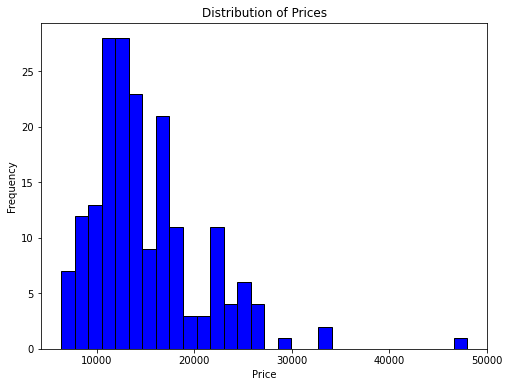

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(jumia2['Price'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

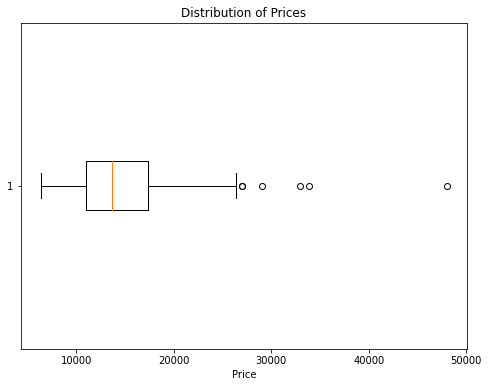

In [35]:
plt.figure(figsize=(8, 6))
plt.boxplot(jumia2['Price'], vert=False)
plt.xlabel('Price')
plt.title('Distribution of Prices')
plt.show()

* The distribution shows that the Price is partially normally distributed and skewed to the right.

* Bar plot of the most available brands :

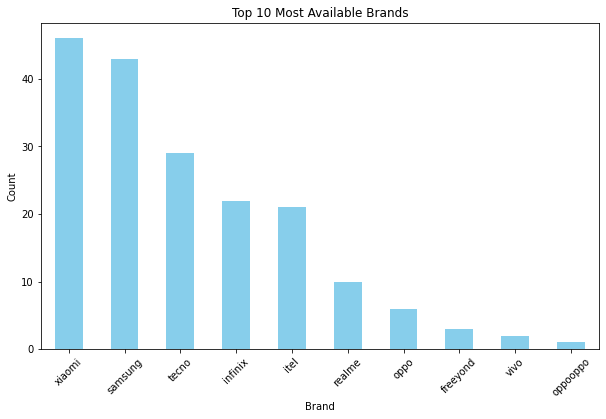

In [36]:
brand_counts = jumia2['Brand'].value_counts()
top_brands = brand_counts.head(10)
plt.figure(figsize=(10, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Top 10 Most Available Brands')
plt.xticks(rotation=45)
plt.show()

* The plot shows that the most available brand of phones on Jumia Kenya is Tecno

* The average price by RAM size of a phone using a bar plot

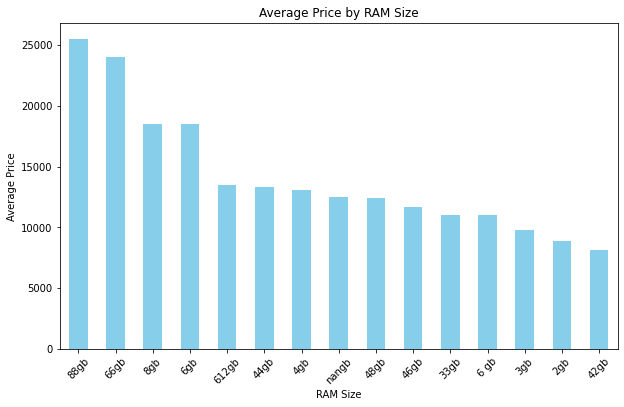

In [37]:
average_price_by_ram = jumia2.groupby('ram_space2')['Price'].mean()

average_price_by_ram = average_price_by_ram.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_price_by_ram.plot(kind='bar', color='skyblue')
plt.xlabel('RAM Size')
plt.ylabel('Average Price')
plt.title('Average Price by RAM Size')
plt.xticks(rotation=45)
plt.show()

* This shows that the phones with higher RAM size are more expensive

* The distribution of the most common Storage capacity with a bar plot

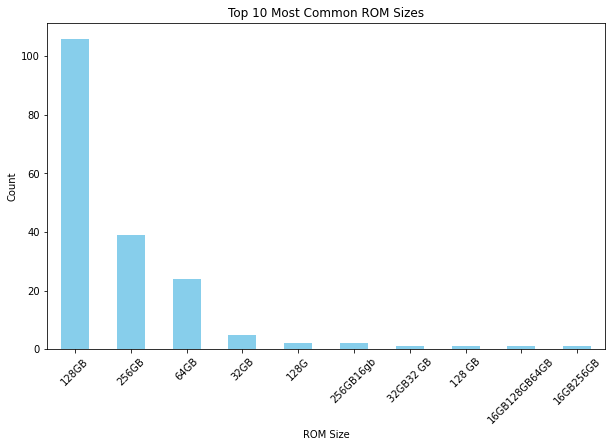

In [38]:
rom_counts = jumia2['storage'].value_counts()

top_roms = rom_counts.head(10)

plt.figure(figsize=(10, 6))
top_roms.plot(kind='bar', color='skyblue')
plt.xlabel('ROM Size')
plt.ylabel('Count')
plt.title('Top 10 Most Common ROM Sizes')
plt.xticks(rotation=45)
plt.show()

* Plot of average price of each phone brand.

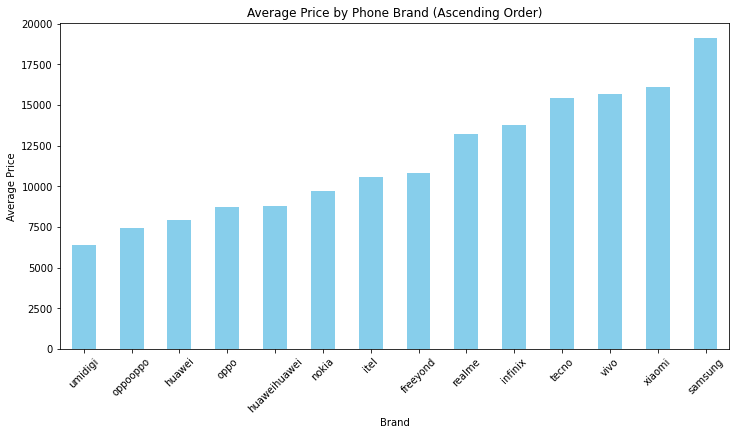

In [39]:
average_price_by_brand = jumia2.groupby('Brand')['Price'].mean()
average_price_by_brand_sorted = average_price_by_brand.sort_values()

plt.figure(figsize=(12, 6))
average_price_by_brand_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Phone Brand (Ascending Order)')
plt.xticks(rotation=45)
plt.show()

* Plot of most common battery capacity in phones

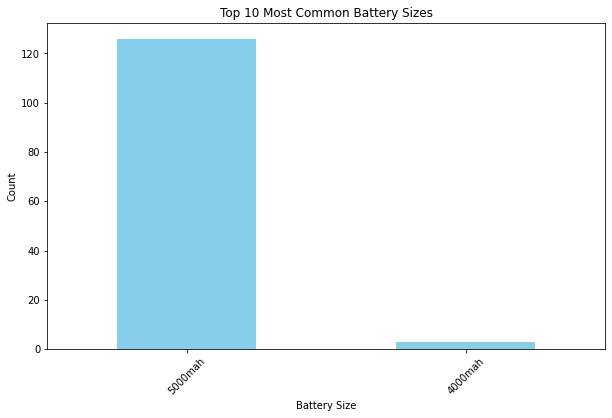

In [40]:
battery_counts = jumia2['battery'].value_counts()

top_battery_sizes = battery_counts.head(10)


plt.figure(figsize=(10, 6))
top_battery_sizes.plot(kind='bar', color='skyblue')
plt.xlabel('Battery Size')
plt.ylabel('Count')
plt.title('Top 10 Most Common Battery Sizes')
plt.xticks(rotation=45)
plt.show()
